# Libraries

In [1]:
# tensorflow utils
import tensorflow as tf

# matplotlib utils
import matplotlib as mpl
import matplotlib.pyplot as plt

# other utils
import foolbox as fb

# local assets
import attacks

# local config
mpl.rcParams['font.family'] = 'monospace'

# Visualize :: Classic Minst

## Datasets

In [10]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

# convert to tensors
q_images = tf.convert_to_tensor(q_images, dtype=tf.float32)
q_labels = tf.convert_to_tensor(q_labels, dtype=tf.int32)

## Model

In [11]:
model = tf.keras.models.load_model('../models/std/classic_mnist.keras')

## Calculate

In [19]:
subset_images = q_images[0 : 10000]
subset_labels = q_labels[0 : 10000]

fmodel = fb.TensorFlowModel(model=model, bounds=(0, 1))

# foolbox
f_images = fb.attacks.L2DeepFoolAttack(steps=10)(fmodel, subset_images, subset_labels, epsilons=1.00)[1]
i_images = fb.attacks.LinfFastGradientAttack()(fmodel, subset_images, subset_labels, epsilons=0.05)[1]

# attacks
j_images = attacks.LowEnergyStochasticGradientSignAttack(model, subset_images, subset_labels, 0.05, 1.00, 1000, 100)

# evaluate
model.evaluate(f_images, subset_labels)
model.evaluate(i_images, subset_labels)
model.evaluate(j_images, subset_labels)

# calculate energy
f_energy = ((subset_images - f_images) ** 2).numpy().sum() / subset_images.shape[0]
i_energy = ((subset_images - i_images) ** 2).numpy().sum() / subset_images.shape[0]
j_energy = ((subset_images - j_images) ** 2).numpy().sum() / subset_images.shape[0]

# calculate deltas
delta_jf = (f_energy - j_energy) / j_energy
delta_ji = (i_energy - j_energy) / j_energy

print(f"Avg Energy DeepFool = {f_energy:.3f} ({delta_jf:+.2%})")
print(f"Avg Energy     FGSM = {i_energy:.3f} ({delta_ji:+.2%})")
print(f"Avg Energy   LESGSM = {j_energy:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6254 - loss: 1.2299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6151 - loss: 1.4775
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6346 - loss: 1.3907
Avg Energy DeepFool = 0.936 (-13.44%)
Avg Energy     FGSM = 1.146 (+5.97%)
Avg Energy   LESGSM = 1.082


## Visualize

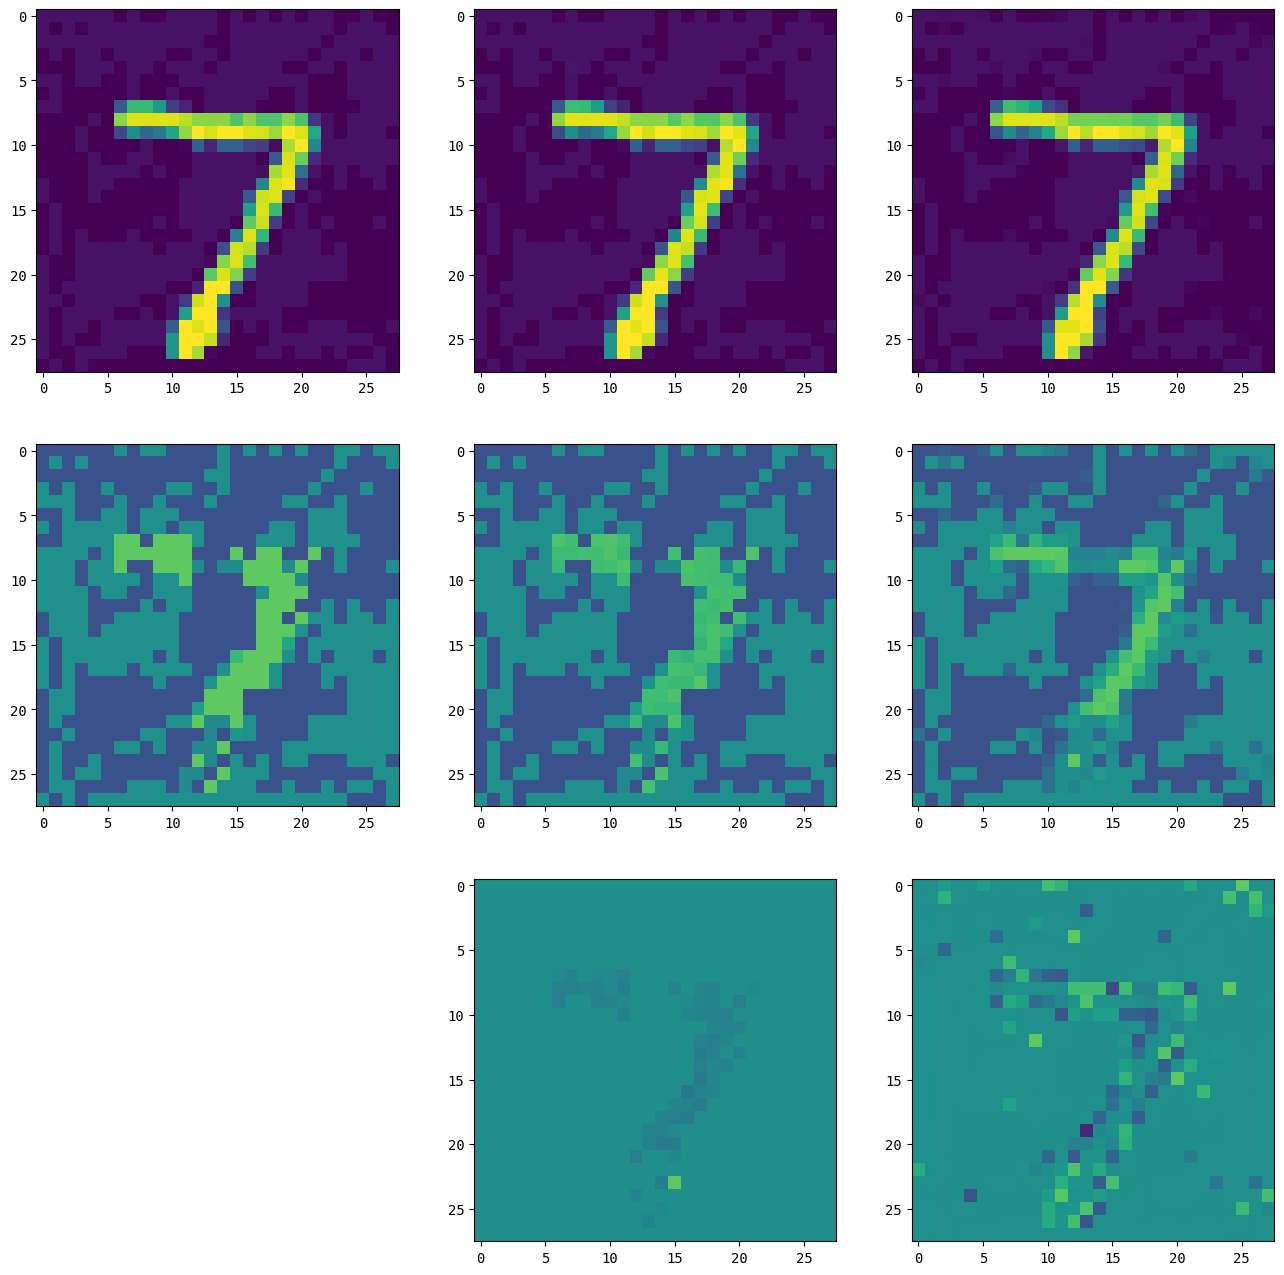

In [20]:
plt.figure(figsize=(16, 16))

idx = 0

plt.subplot(3, 3, 1)
plt.imshow(i_images[idx])

plt.subplot(3, 3, 2)
plt.imshow(j_images[idx])

plt.subplot(3, 3, 3)
plt.imshow(f_images[idx])

plt.subplot(3, 3, 4)
plt.imshow(subset_images[idx] - i_images[idx], vmin=-0.1, vmax=+0.1)

plt.subplot(3, 3, 5)
plt.imshow(subset_images[idx] - j_images[idx], vmin=-0.1, vmax=+0.1)

plt.subplot(3, 3, 6)
plt.imshow(subset_images[idx] - f_images[idx], vmin=-0.1, vmax=+0.1)

plt.subplot(3, 3, 8)
plt.imshow(i_images[idx] - j_images[idx], vmin=-0.1, vmax=+0.1)

plt.subplot(3, 3, 9)
plt.imshow(i_images[idx] - f_images[idx], vmin=-0.1, vmax=+0.1)

# Visualize :: Fashion Minst

## Datasets

In [6]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.fashion_mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

# convert to tensors
q_images = tf.convert_to_tensor(q_images, dtype=tf.float32)
q_labels = tf.convert_to_tensor(q_labels, dtype=tf.int32)

## Model

In [7]:
model = tf.keras.models.load_model('../models/std/fashion_mnist.keras')

## Calculate

In [8]:
subset_images = q_images[0 : 10000]
subset_labels = q_labels[0 : 10000]

fmodel = fb.TensorFlowModel(model=model, bounds=(0, 1))

# foolbox
f_images = fb.attacks.L2DeepFoolAttack(steps=10)(fmodel, subset_images, subset_labels, epsilons=0.35)[1]
i_images = fb.attacks.LinfFastGradientAttack()(fmodel, subset_images, subset_labels, epsilons=0.02)[1]

# attacks
j_images = attacks.LowEnergyStochasticGradientSignAttack(model, subset_images, subset_labels, 0.02, 1.25, 1000, 100)

# evaluate
model.evaluate(i_images, subset_labels)
model.evaluate(j_images, subset_labels)
model.evaluate(f_images, subset_labels)

# calculate energy
f_energy = ((subset_images - f_images) ** 2).numpy().sum() / subset_images.shape[0]
i_energy = ((subset_images - i_images) ** 2).numpy().sum() / subset_images.shape[0]
j_energy = ((subset_images - j_images) ** 2).numpy().sum() / subset_images.shape[0]

# calculate deltas
delta_jf = (f_energy - j_energy) / j_energy
delta_ji = (i_energy - j_energy) / j_energy

print(f"Avg Energy DeepFool = {f_energy:.3f} ({delta_jf:+.2%})")
print(f"Avg Energy     FGSM = {i_energy:.3f} ({delta_ji:+.2%})")
print(f"Avg Energy   LESGSM = {j_energy:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5924 - loss: 1.2587
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6203 - loss: 1.1731
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6176 - loss: 0.6525
Avg Energy DeepFool = 0.094 (-48.95%)
Avg Energy     FGSM = 0.231 (+25.63%)
Avg Energy   LESGSM = 0.184


## Visualize

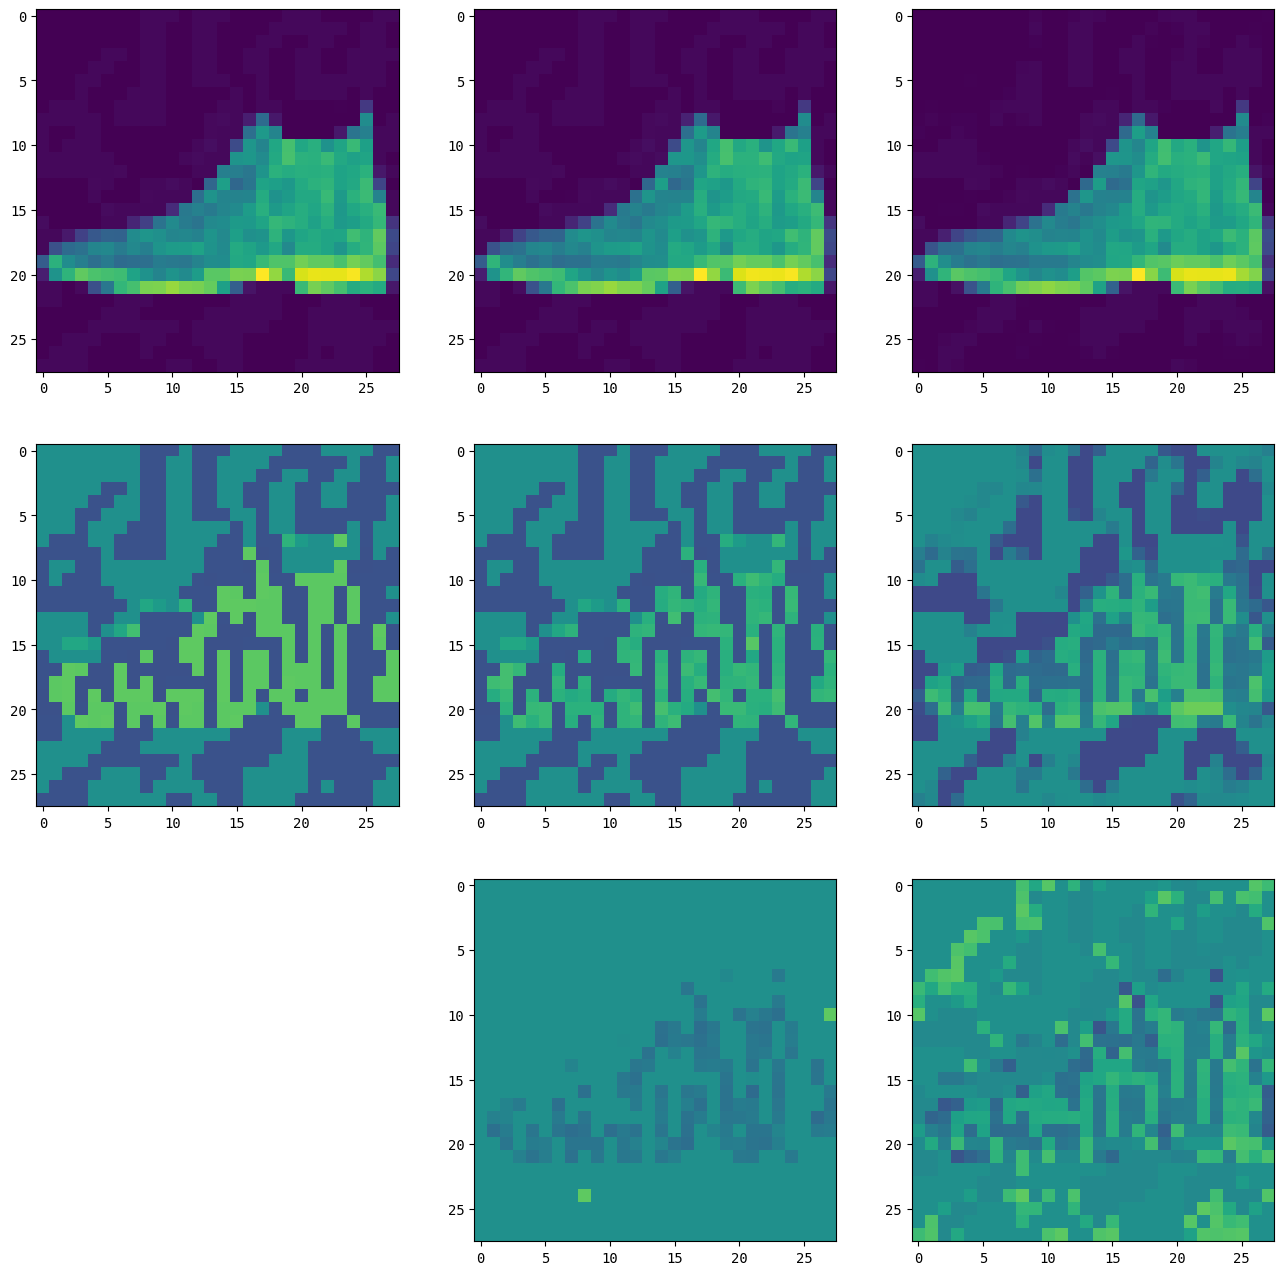

In [9]:
plt.figure(figsize=(16, 16))

idx = 0

plt.subplot(3, 3, 1)
plt.imshow(i_images[idx])

plt.subplot(3, 3, 2)
plt.imshow(j_images[idx])

plt.subplot(3, 3, 3)
plt.imshow(f_images[idx])

plt.subplot(3, 3, 4)
plt.imshow(subset_images[idx] - i_images[idx], vmin=-0.04, vmax=+0.04)

plt.subplot(3, 3, 5)
plt.imshow(subset_images[idx] - j_images[idx], vmin=-0.04, vmax=+0.04)

plt.subplot(3, 3, 6)
plt.imshow(subset_images[idx] - f_images[idx], vmin=-0.04, vmax=+0.04)

plt.subplot(3, 3, 8)
plt.imshow(i_images[idx] - j_images[idx], vmin=-0.04, vmax=+0.04)

plt.subplot(3, 3, 9)
plt.imshow(i_images[idx] - f_images[idx], vmin=-0.04, vmax=+0.04)